<a href="https://colab.research.google.com/github/lahirurane/MERN_Example/blob/master/UTS_ML2019_A2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
from nltk.tokenize import word_tokenize 
import nltk
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score , confusion_matrix
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

In [145]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/datasets



Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/datasets


Load Data

In [146]:
dataset = pd.read_csv('./amazon_alexa.tsv', delimiter='\t')
dataset.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


Calculate review comment text length

In [0]:
dataset['review_text_length'] = dataset.verified_reviews.apply(lambda x: len(x))

punctuations, numbers and special characters do not help much

In [0]:
# remove special characters, numbers, punctuations
dataset['review_cleared_text'] = dataset['verified_reviews'].str.replace("[^a-zA-Z#]", " ")

Concert all text to Lower case

In [0]:
dataset['review_cleared_text'] = dataset.review_clear.apply(lambda x: x.lower())

In [182]:
print('The mean for the review comment text length:',dataset['review_text_length'].mean())
print('The standard deviation for the review comment text length:',dataset['review_text_length'].std())
print('The maximum for the review comment text length:',dataset['review_text_length'].max())

The mean for the review comment text length: 132.0495238095238
The standard deviation for the review comment text length: 182.0999522038919
The maximum for the review comment text length: 2851


In [0]:
# print("test data",data_test.count())
# data_test.head()
#np.delete(data_test, np.s_[5], 1)

Text(0.5, 1.0, 'Distribution of review comment text lengths')

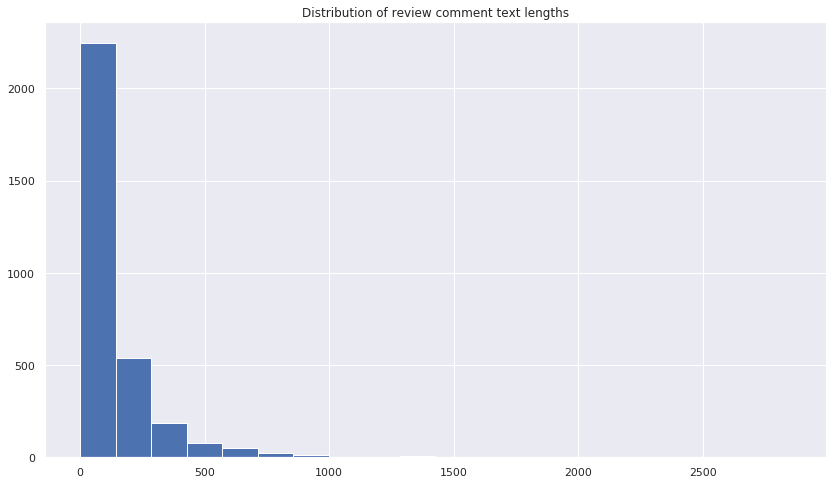

In [184]:
dataset['review_item_length'].hist(bins=20)
plt.title('Distribution of review comment text lengths')

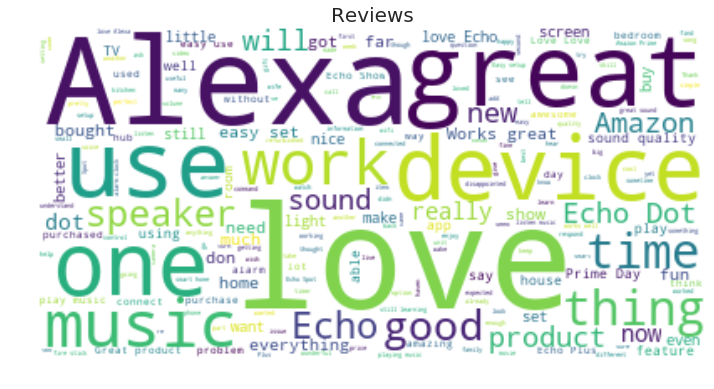

In [187]:
np.random.seed(500)
sns.set(rc={'figure.figsize':(12,8)})
reviews = ' '.join(dataset['review_cleared_text'].tolist())

wordcloud_fig = WordCloud(background_color="white").generate(reviews)
plt.figure()
plt.imshow(wordcloud_fig, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Reviews',size=20)
plt.show()

Text(0.5, 1.0, 'Review count for each product')

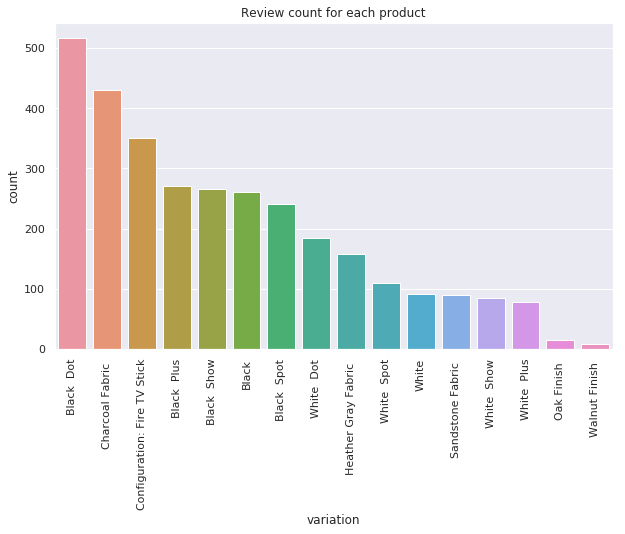

In [188]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(dataset.variation,
              order = dataset['variation'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Review count for each product')

Text(0.5, 1.0, 'Rating count')

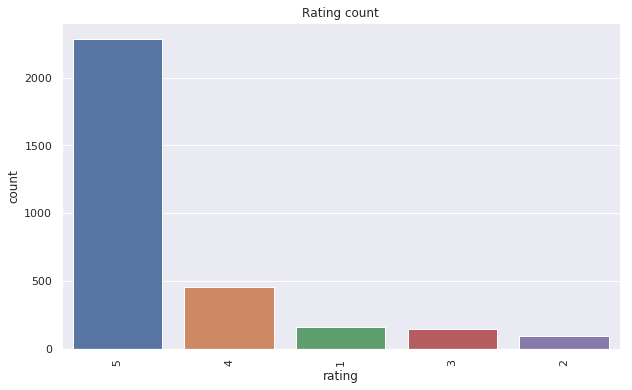

In [190]:


sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(dataset.rating,
            order = dataset['rating'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Rating count')

Get Reviews comments which has given a rating 5

In [0]:
data5 = dataset[dataset.rating == 5]
data_not_5 = dataset[dataset.rating != 5]
data_1 = dataset[dataset.rating == 1]

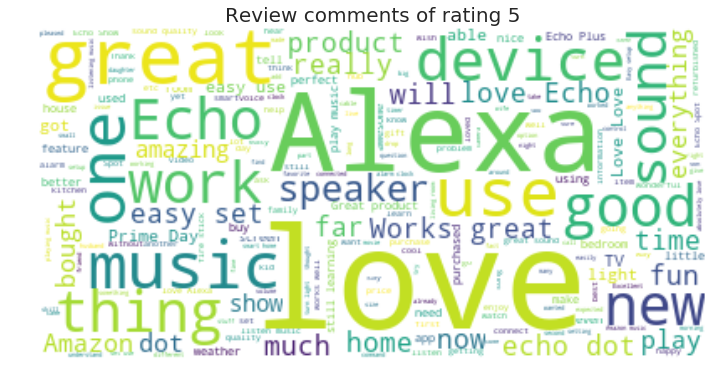

In [196]:
sns.set(rc={'figure.figsize':(12,8)})
reviews = ' '.join(data5['verified_reviews'].tolist())

wordcloud_fig_2 = WordCloud(background_color="white").generate(reviews)
plt.figure()
plt.imshow(wordcloud_fig_2, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Review comments of rating 5',size=20)
plt.show()

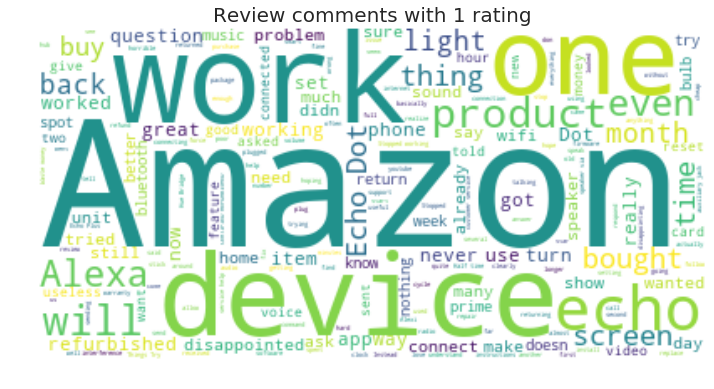

In [198]:
sns.set(rc={'figure.figsize':(12,8)})
reviews = ' '.join(data_1['verified_reviews'].tolist())

wordcloud_fig_3 = WordCloud(background_color="white").generate(reviews)
plt.figure()
plt.imshow(wordcloud_fig_3, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Review comments with 1 rating',size=20)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

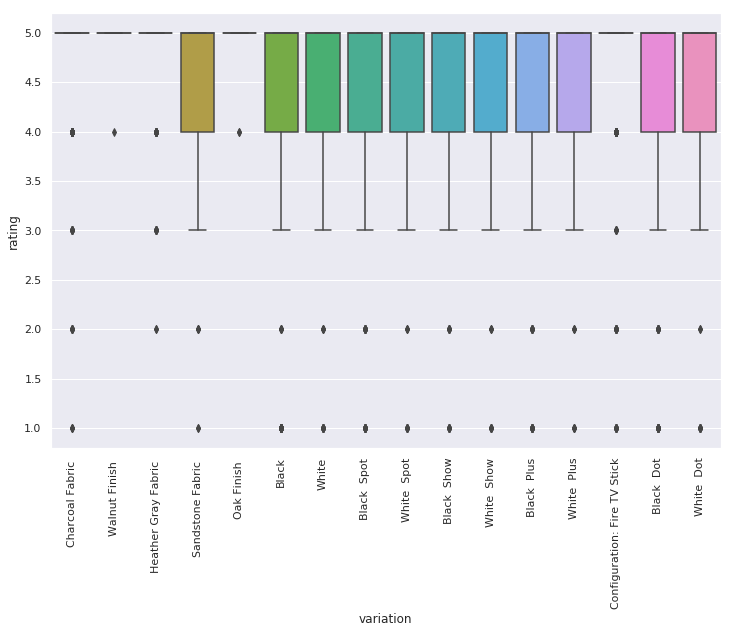

In [199]:
sns.boxplot(dataset.variation, dataset.rating)
plt.xticks(rotation = 90)

Most of the Rating has been given a 5. Therefore, the comments which has given a 5 has considered as positive and comments which has a rating 4 and lower considered as negative.

In [0]:
dataset['positive'] = 0
dataset.loc[dataset['rating'] ==5, 'positive'] = 1

output_label = dataset['positive']

In [200]:

nltk.download('punkt')
nltk.download('stopwords')

# word_tokenize(dataset.verified_reviews[0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:

stop_words = set(stopwords.words('english')) 

#Tokenize words
dataset['review_clear'] = dataset.verified_reviews.apply(lambda x: word_tokenize(x))

#remove stop words 
dataset['review_clear'] = dataset.review_clear.apply(lambda x: [w for w in x if w not in stop_words])

ps = PorterStemmer() 
  
# choose some words to be stemmed 
dataset['review_clear'] = dataset.review_clear.apply(lambda x: [ps.stem(w) for w in x])
 

#append sentence
dataset['review_clear'] = dataset.review_clear.apply(lambda x: ' '.join(x))


In [166]:
dataset.head()

,rating,date,variation,verified_reviews,feedback,review_item_length,review_clear,positive
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,love echo !,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,love !,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,"sometim play game , answer question correctli ...",0
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,"I lot fun thing . My 4 yr old learn dinosaur ,...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,music,1


In [167]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 8 columns):
rating                3150 non-null int64
date                  3150 non-null object
variation             3150 non-null object
verified_reviews      3150 non-null object
feedback              3150 non-null int64
review_item_length    3150 non-null int64
review_clear          3150 non-null object
positive              3150 non-null int64
dtypes: int64(4), object(4)
memory usage: 197.0+ KB


In [168]:
#testing spacy library
import spacy
nlp = spacy.load('en')

def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')
        
for i in range(15, 50):
    one_sentence = dataset['verified_reviews'][i]
    doc = nlp(one_sentence)
    spacy.displacy.render(doc, style='ent',jupyter=True)

/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


In [202]:

bag_of_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# creating bag of words for training bag-of-words feature matrix
bagOfWords = bag_of_word_vectorizer.fit_transform(dataset['review_clear'])
print("bow",bagOfWords)


bow   (0, 511)	1
  (0, 273)	1
  (1, 511)	1
  (2, 815)	1
  (2, 633)	1
  (2, 359)	1
  (2, 47)	2
  (2, 680)	1
  (2, 203)	1
  (2, 36)	1
  (2, 755)	1
  (2, 372)	1
  (2, 991)	1
  (2, 489)	1
  (2, 11)	1
  (2, 916)	1
  (2, 488)	1
  (2, 76)	1
  (2, 404)	1
  (3, 633)	2
  (3, 359)	1
  (3, 489)	1
  (3, 488)	1
  (3, 508)	1
  (3, 354)	1
  :	:
  (3148, 823)	1
  (3148, 550)	1
  (3148, 46)	1
  (3148, 827)	1
  (3148, 932)	1
  (3148, 377)	1
  (3148, 517)	1
  (3148, 206)	1
  (3148, 797)	1
  (3148, 175)	1
  (3148, 860)	1
  (3148, 678)	2
  (3148, 351)	1
  (3148, 263)	2
  (3148, 407)	2
  (3148, 464)	1
  (3148, 182)	1
  (3148, 545)	1
  (3148, 586)	1
  (3148, 69)	1
  (3148, 477)	1
  (3148, 844)	1
  (3148, 110)	1
  (3148, 532)	1
  (3149, 370)	1


In [0]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# # TF-IDF feature matrix
# tfidf = tfidf_vectorizer.fit_transform(dataset['review_clear'])
# print("tfidf",tfidf)


Split Dataset for training

In [0]:
data_train_set_1, data_test_set_1, output_label_train_1, output_label_test_1 = train_test_split(bagOfWords, output_label, test_size=0.33
                                    ,random_state=53)

In [209]:



# splitting data into training and validation set
trainer_model_data, test_model_data, label_train_data, label_test_data = train_test_split(data_train_set_1, output_label_train_1, random_state=42, test_size=0.3)

logicticReg = LogisticRegression()
logicticReg.fit(trainer_model_data, label_train_data) # training the model

logicticReg_prediction = logicticReg.predict_proba(test_model_data) # predicting on the validation set
logicticReg_prediction_int = logicticReg_prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
logicticReg_prediction_int = logicticReg_prediction_int.astype(np.int)

f1_score(label_test_data, logicticReg_prediction_int) # calculating f1 score

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8820116054158608

In [210]:

test_pred = lreg.predict_proba(data_test_set_1)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
#dataset['positive'] = test_pred_int
#submission = test[['id','positive']]


score = accuracy_score(output_label_test_1, test_pred_int)
print('Accuracy is:',score)
f1 = f1_score(y_test, test_pred_int)
print('F score is:',f1)

Accuracy is: 0.7855769230769231
F score is: 0.8660660660660662


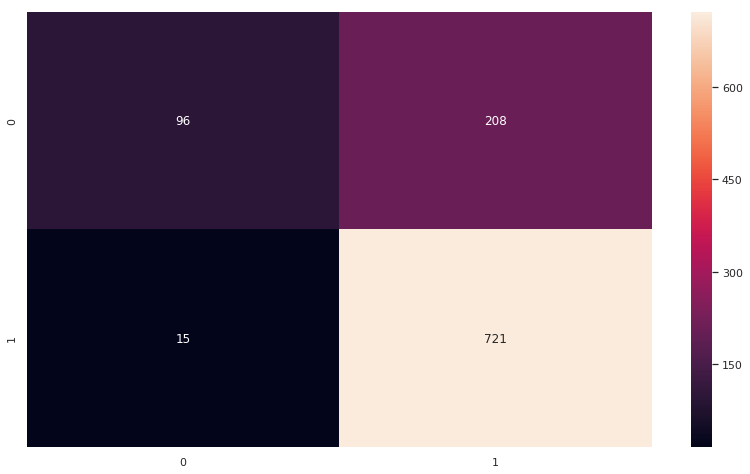

In [173]:

sns.heatmap(confusion_matrix(y_test,test_pred_int), annot=True,fmt='2.0f')

In [174]:


xg_reg = xgb.XGBRegressor()

xg_reg.fit(xtrain_bow, ytrain)

xg_preds = xg_reg.predict(xvalid_bow)

predictions = [round(value) for value in xg_preds]
# evaluate predictions
accuracy = accuracy_score(yvalid, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:10:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: 78.67%


https://machinelearningmastery.com/evaluate-gradient-boosting-models-xgboost-python/

In [175]:


clf = MultinomialNB()
clf.fit(xtrain_bow, ytrain)
nb_preds = clf.predict(xvalid_bow)
f1_score(yvalid, nb_preds)

0.8812877263581489

In [176]:

clf = svm.SVC(gamma='scale')
clf.fit(xtrain_bow, ytrain)  
svm_predict = clf.predict(xvalid_bow)

f1_score(yvalid, svm_predict)

0.8801534036433366

Github URL : https://github.com/lahirurane/UTS_ML2019_A2/blob/master/UTS_ML2019_A2_.ipynb